# Gini Coefficient Calculation

In [ ]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Random Data

In [3]:
# totalPopulation = 10000
# incomes = (np.random.beta(a = 2.0, b = 5.0, size = [totalPopulation]) * 1000).astype(int)
# incomes

In [4]:
totalPopulation = 10
Vals = np.array([10, 5, 4, 9, 8, 3, 1, 2, 9, 3])

## Lorenz curve
* The lorenz curve gives the proportion of the total income of the population (y-axis) that is cumulatively earned by the bottom x of the population (x-axis)

In [5]:
# sort people by their incomes
SortedVals = Vals.sort()

In [6]:
Vals

array([ 1,  2,  3,  3,  4,  5,  8,  9,  9, 10])

In [7]:
CumulativeVals = Vals.cumsum()

In [8]:
CumulativeVals

array([ 1,  3,  6,  9, 13, 18, 26, 35, 44, 54])

In [9]:
# add the zeroth term in the cummulative sum - so that the lorenz plot start from (0,0)
CumulativeVals = np.insert(CumulativeVals, 0, 0)

In [10]:
CumulativeVals

array([ 0,  1,  3,  6,  9, 13, 18, 26, 35, 44, 54])

### Plot the lorenz and equality curves

In [11]:
avg = CumulativeVals[-1]/10
bottom_x_of_population = np.arange(0, totalPopulation+1)
equality_curve = [i*avg for i in np.arange(0, totalPopulation+1)]

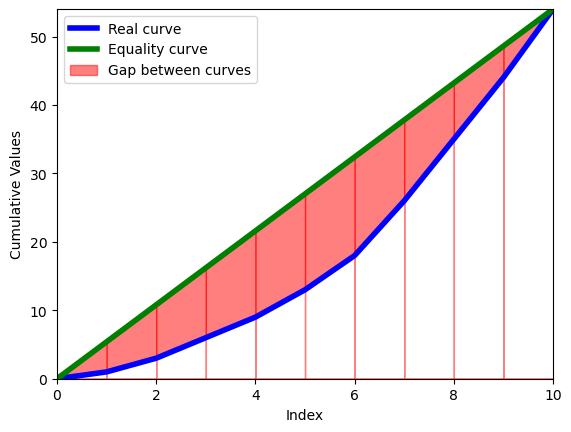

In [12]:
plt.plot(bottom_x_of_population, CumulativeVals, color = "blue", linewidth=4, label = 'Real curve')
plt.plot([0, totalPopulation], [0, CumulativeVals[-1]], color = "green", linewidth=4, label = 'Equality curve')
plt.fill_between([bottom_x_of_population[0], bottom_x_of_population[0], 
                  bottom_x_of_population[1], bottom_x_of_population[1], bottom_x_of_population[0]], 
                 [CumulativeVals[0], equality_curve[0], equality_curve[1], CumulativeVals[1], 
                  CumulativeVals[0]], color = "red", alpha = 0.5, label = 'Gap between curves')
for idx in np.arange(1, totalPopulation):
    plt.fill_between(
    [bottom_x_of_population[idx], bottom_x_of_population[idx], bottom_x_of_population[idx+1], 
     bottom_x_of_population[idx+1], bottom_x_of_population[idx]],
    # [cummulative_incomes[idx], cummulative_incomes[idx+1]],
    [CumulativeVals[idx], equality_curve[idx], equality_curve[idx+1], 
     CumulativeVals[idx+1], CumulativeVals[idx]], color = "red", alpha = 0.5
)
plt.xlim([0, totalPopulation])
plt.ylim([0, CumulativeVals[-1]])
plt.ylabel("Cumulative Values")
# plt.xlabel("Bottom x of population")
plt.xlabel("Index")
plt.legend()
plt.show()

### Calculate areas under lorenz curve and equality curve

* Area under the lorenz curve can be calculated based on three riemann sum expressions (see diagram below for the comparision between the terms)

* [Right riemann sum][1]: (previously used in the old version of the code)
$$\sum_{i=0}^{totalPopulation} array[i] * 1$$

* [Left riemann sum][1]:
$$\sum_{i=0}^{totalPopulation-1} array[i] * 1$$

* [Riemann sum trapezoidal][2]: (used in the current code)
$$\sum_{i=0}^{totalPopulation-1} \frac{array[i]+array[i+1]}{2} * 1$$

[1]: https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/a/left-and-right-riemann-sums
[2]: https://en.wikipedia.org/wiki/Trapezoidal_rule

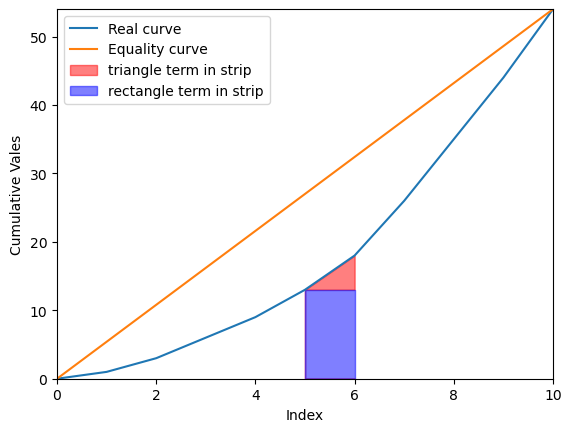

In [13]:
plt.plot(bottom_x_of_population, CumulativeVals, label = 'Real curve')
plt.plot([0, totalPopulation], [0, CumulativeVals[-1]], label = 'Equality curve')

# plot the term inside the riemann sum
# idx = 1 if totalPopulation < 10 else totalPopulation//4
# plt.fill_between(  # shade the region to indicate we are interested in area
#     [bottom_x_of_population[idx-1], bottom_x_of_population[idx]],
#     [cummulative_incomes[idx], cummulative_incomes[idx]], 
#     color = "green",
#     alpha = 0.5,
#     label = "right riemann term"
# )

# idx = 4 if totalPopulation < 10 else 3*totalPopulation//4
# plt.fill_between(  # shade the region to indicate we are interested in area
#     [bottom_x_of_population[idx], bottom_x_of_population[idx+1]],
#     [cummulative_incomes[idx], cummulative_incomes[idx]], 
#     color = "blue",
#     alpha = 0.5,
#     label = "left riemann term"
# )

idx = 2 if totalPopulation < 10 else totalPopulation//2
plt.fill_between(
    [bottom_x_of_population[idx], bottom_x_of_population[idx+1], bottom_x_of_population[idx+1], bottom_x_of_population[idx]],
    # [cummulative_incomes[idx], cummulative_incomes[idx+1]],
    [CumulativeVals[idx], CumulativeVals[idx], CumulativeVals[idx+1], CumulativeVals[idx]],
    color = "red",
    alpha = 0.5,
    label = "triangle term in strip"
)
plt.fill_between(
    [bottom_x_of_population[idx], bottom_x_of_population[idx+1]],
    [CumulativeVals[idx], CumulativeVals[idx]],
    color = "blue",
    alpha = 0.5,
    label = "rectangle term in strip"
)

plt.xlim([0, totalPopulation])
plt.ylim([0, CumulativeVals[-1]])
plt.ylabel("Cumulative Vales")
plt.xlabel("Index")
plt.legend()
plt.show()

In [14]:
# right_lorenz_area = cummulative_incomes.sum()
# left_lorenz_area = cummulative_incomes[:-1].sum()
# trapezoidal_lorenz_area = 0.5 * (cummulative_incomes[:totalPopulation-1].sum() + cummulative_incomes[1:].sum())  # from the expression stated before
trapezoidal_lorenz_area = 0.5 * (CumulativeVals[:totalPopulation].sum() + CumulativeVals[1:].sum())  # corrected

In [15]:
CumulativeVals[:totalPopulation]

array([ 0,  1,  3,  6,  9, 13, 18, 26, 35, 44])

In [16]:
CumulativeVals[1:].sum()

209

In [17]:
trapezoidal_lorenz_area

182.0

In [18]:
equality_area = 0.5 * totalPopulation * CumulativeVals[-1] # half base times height

In [19]:
equality_area

270.0

## Gini Coefficient

In [20]:
gini_coefficient_trapezoidal = (equality_area - trapezoidal_lorenz_area)/equality_area
gini_coefficient_trapezoidal

0.32592592592592595

In [ ]:
# gini_coefficient_left = (equality_area - left_lorenz_area)/equality_area
# gini_coefficient_left

In [ ]:
# gini_coefficient_right = (equality_area - right_lorenz_area)/equality_area
# gini_coefficient_right

In [ ]:
# preferred_gini = gini_coefficient_trapezoidal
# preferred_gini